In [1]:
# Imports

# Preparing the data visualization
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as m
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Importing the datas:
dados = pd.DataFrame(pd.read_csv('/kaggle/input/social-progress-index/spi.csv', encoding='UTF-8'))
dados.head()

,spi_rank,country,spi_score,basic_human_needs,wellbeing,opportunity,basic_nutri_med_care,water_sanitation,shelter,personal_safety,access_basic_knowledge,access_info_comm,health_wellness,env_quality,personal_rights,personal_freedom_choice,inclusiveness,access_adv_edu
0,1.0,Norway,92.63,95.29,93.30,89.30,98.81,98.33,93.75,90.29,98.66,95.80,89.32,89.44,96.34,91.16,83.77,85.92
1,2.0,Finland,92.26,95.62,93.09,88.07,98.99,99.26,96.48,87.75,96.32,95.14,85.73,95.15,96.13,88.10,82.81,85.23
2,3.0,Denmark,92.15,95.30,92.74,88.41,98.62,98.21,94.92,89.46,97.44,98.18,85.15,90.20,97.08,90.03,81.64,84.89
3,4.0,Iceland,91.78,96.66,93.65,85.04,98.99,98.82,93.16,95.66,99.51,93.12,91.02,90.93,95.14,88.01,77.63,79.39
4,5.0,Switzerland,91.78,95.25,93.80,86.28,98.72,98.96,92.97,90.35,98.60,95.07,91.50,90.05,96.69,90.65,74.81,82.99


In [3]:
# Quantity of lines and columns:
dados.shape

(169, 18)

In [4]:
# Quantity of unique values by column:
dados.nunique()

spi_rank                   168
country                    169
spi_score                  167
basic_human_needs          165
wellbeing                  166
opportunity                165
basic_nutri_med_care       160
water_sanitation           167
shelter                    159
personal_safety            164
access_basic_knowledge     168
access_info_comm           169
health_wellness            167
env_quality                164
personal_rights            167
personal_freedom_choice    167
inclusiveness              166
access_adv_edu             165
dtype: int64

In [5]:
# Quantity of null values by column:
dados.isnull().sum()

spi_rank                   1
country                    0
spi_score                  0
basic_human_needs          0
wellbeing                  0
opportunity                0
basic_nutri_med_care       0
water_sanitation           0
shelter                    0
personal_safety            0
access_basic_knowledge     0
access_info_comm           0
health_wellness            0
env_quality                0
personal_rights            0
personal_freedom_choice    0
inclusiveness              0
access_adv_edu             0
dtype: int64

In [6]:
# Deleting the column 'spi_rank':
dados.drop(columns=['spi_rank'], axis = 1, inplace = True) 

In [7]:
# Converting the column 'country' to index:
dados = dados.set_index('country')

In [8]:
type(dados)

pandas.core.frame.DataFrame

In [9]:
# Applyng clusterization, slicing into 3 grupos using KMeans:
clustering_kmeans = KMeans(n_clusters=3)

# Creating the column 'clusters' into dataset 'dados':
dados['clusters'] = clustering_kmeans.fit_predict(dados)

In [10]:
# Applyng column dimensionality reduction of dataset 'dados' using the PCA:

# Chosing the number of components:
pca_num_components = 2

# Applyng the PCA:
reduced_data = PCA(n_components=pca_num_components).fit_transform(dados)

# Creating dataset 'results' com as colunas 'pca1', 'pca2':
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

# Adding the column 'clusters' into dataset 'result':
results['clusters'] = dados['clusters'].values


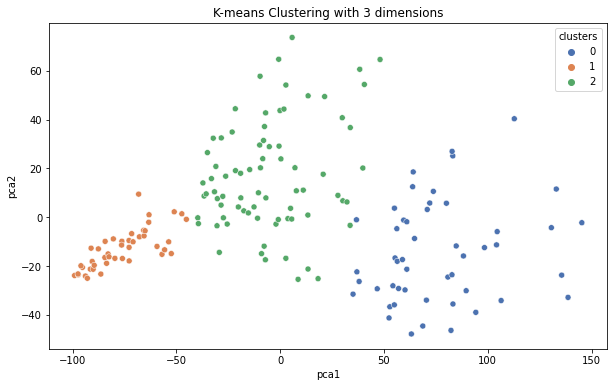

In [11]:
# Ploting the division of groups:
plt.subplots(figsize=(10,6)) 
sns.scatterplot(x="pca1", y="pca2", hue="clusters", data=results, palette='deep')
plt.title('K-means Clustering with 3 dimensions')
plt.show()

In [12]:
print(results.shape)
print(dados.shape)

(169, 3)
(169, 17)


In [13]:
# Filttering the country names of each group:
grupo0 = dados.loc[dados['clusters'] == 0]
grupo0.index

Index(['Senegal', 'Timor-Leste', 'Kenya', 'Myanmar', 'Gambia. The', 'Malawi',
       'Benin', 'Tanzania', 'Comoros', 'Cambodia', 'Solomon Islands',
       'Lesotho', 'Côte d'Ivoire', 'Togo', 'Zimbabwe', 'Zambia',
       'Sierra Leone', 'Rwanda', 'Nigeria', 'Cameroon', 'Uganda', 'Eswatini',
       'Liberia', 'Pakistan', 'Burkina Faso', 'Laos', 'Djibouti',
       'Congo. Republic of', 'Ethiopia', 'Madagascar', 'Mozambique', 'Mali',
       'Mauritania', 'Angola', 'Equatorial Guinea', 'Sudan',
       'Papua New Guinea', 'Haiti', 'Guinea-Bissau', 'Guinea', 'Burundi',
       'Congo. Democratic Republic of', 'Niger', 'Yemen', 'Somalia', 'Eritrea',
       'Chad', 'Central African Republic', 'South Sudan'],
      dtype='object', name='country')

In [14]:
# Filttering the country names of each group:
grupo1 = dados.loc[dados['clusters'] == 1]
grupo1.index

Index(['Norway', 'Finland', 'Denmark', 'Iceland', 'Switzerland', 'Canada',
       'Sweden', 'Netherlands', 'Japan', 'Germany', 'Australia', 'New Zealand',
       'Ireland', 'Austria', 'Luxembourg', 'Belgium', 'Korea. Republic of',
       'United Kingdom', 'France', 'Spain', 'Estonia', 'Czechia', 'Italy',
       'United States', 'Portugal', 'Slovenia', 'Lithuania', 'Malta', 'Cyprus',
       'Singapore', 'Greece', 'Israel', 'Slovakia', 'Latvia', 'Poland',
       'Croatia', 'Chile', 'Costa Rica', 'Uruguay', 'Barbados', 'Argentina',
       'Hungary', 'Bulgaria', 'Romania'],
      dtype='object', name='country')

In [15]:
# Filttering the country names of each group:
grupo2 = dados.loc[dados['clusters'] == 2]
grupo2.index

Index(['Mauritius', 'Trinidad and Tobago', 'Serbia', 'Ukraine', 'Georgia',
       'Kuwait', 'Malaysia', 'Panama', 'Jamaica', 'Belarus', 'Armenia',
       'Albania', 'Montenegro', 'Tunisia', 'Ecuador', 'Moldova', 'Peru',
       'Russia', 'Republic of North Macedonia', 'Kazakhstan', 'Brazil',
       'Bosnia and Herzegovina', 'United Arab Emirates', 'Mexico', 'Paraguay',
       'Colombia', 'Thailand', 'Sri Lanka', 'Dominican Republic', 'Maldives',
       'Suriname', 'Cuba', 'Cabo Verde', 'Vietnam', 'Mongolia', 'South Africa',
       'Fiji', 'Kyrgyzstan', 'Jordan', 'Bhutan', 'Oman', 'Qatar', 'Turkey',
       'Lebanon', 'Bolivia', 'Algeria', 'Botswana', 'West Bank and Gaza',
       'Guyana', 'Indonesia', 'Uzbekistan', 'Bahrain', 'Philippines', 'Iran',
       'Ghana', 'China', 'Morocco', 'Sao Tome and Principe', 'El Salvador',
       'Gabon', 'Saudi Arabia', 'Namibia', 'Azerbaijan', 'Nicaragua', 'Egypt',
       'Honduras', 'Guatemala', 'Nepal', 'India', 'Iraq', 'Libya',
       'Turkmenistan'

In [16]:
# Classifying the values of 3 clusters (0, 1 e 2) by levels:
mapping_quality_life = {2:'Elevada',
                        0:'Intermediaria',
                        1:'Baixa',} 

# Creating the column 'Quality_Life' to represent the countries' quality of life:
dados['Quality_Life'] = dados.clusters.map(mapping_quality_life) 

In [17]:
print('Nessa lista há', dados.loc[dados['Quality_Life'] == 'Elevada'].count()[0], 'países com a qualidade de vida elevada.')
print('Nessa lista há', dados.loc[dados['Quality_Life'] == 'Intermediaria'].count()[0], 'países com a qualidade de vida intermediária.')
print('Nessa lista há', dados.loc[dados['Quality_Life'] == 'Baixa'].count()[0], 'países com a qualidade de vida baixa.')

Nessa lista há 76 países com a qualidade de vida elevada.
Nessa lista há 49 países com a qualidade de vida intermediária.
Nessa lista há 44 países com a qualidade de vida baixa.


In [18]:
# Creating a filtter with the method 'loc':
dados.loc['Brazil']

spi_score                    72.06
basic_human_needs            79.15
wellbeing                    75.19
opportunity                  61.83
basic_nutri_med_care         93.61
water_sanitation             86.92
shelter                      87.33
personal_safety              48.75
access_basic_knowledge       75.74
access_info_comm             81.16
health_wellness              64.42
env_quality                  79.44
personal_rights              75.93
personal_freedom_choice      65.51
inclusiveness                 47.0
access_adv_edu               58.86
clusters                         2
Quality_Life               Elevada
Name: Brazil, dtype: object